In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

sns.set_style('whitegrid')
plt.rcParams['font.size']=12
plt.rcParams['figure.figsize']=(15,5)

df=pd.read_csv(r'C:\Users\TajwarAbtahee\OneDrive - JCW Resourcing\Desktop\Python\practice\weather_2012.csv')
df.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date/Time           8784 non-null   object 
 1   Temp (C)            8784 non-null   float64
 2   Dew Point Temp (C)  8784 non-null   float64
 3   Rel Hum (%)         8784 non-null   int64  
 4   Wind Spd (km/h)     8784 non-null   int64  
 5   Visibility (km)     8784 non-null   float64
 6   Stn Press (kPa)     8784 non-null   float64
 7   Weather             8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [3]:
df['Date/Time']=pd.to_datetime(df['Date/Time'])

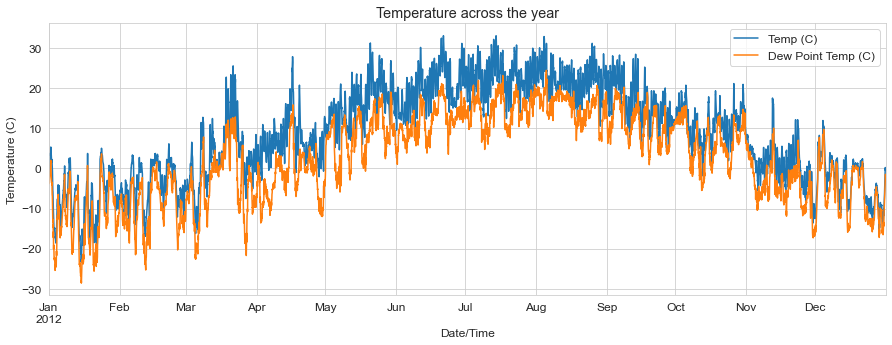

In [4]:
df[['Date/Time','Temp (C)','Dew Point Temp (C)']].plot(x='Date/Time')
plt.ylabel('Temperature (C)')
plt.title('Temperature across the year')
plt.show()

In [5]:
df.corr().style.background_gradient(cmap='RdYlGn')

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa)
Temp (C),1.000000,0.932714,-0.220182,-0.061876,0.273455,-0.236389
Dew Point Temp (C),0.932714,1.000000,0.139494,-0.095685,0.050813,-0.320616
Rel Hum (%),-0.220182,0.139494,1.000000,-0.092743,-0.633683,-0.231424
Wind Spd (km/h),-0.061876,-0.095685,-0.092743,1.000000,0.004883,-0.356613
Visibility (km),0.273455,0.050813,-0.633683,0.004883,1.000000,0.231847
Stn Press (kPa),-0.236389,-0.320616,-0.231424,-0.356613,0.231847,1.000000


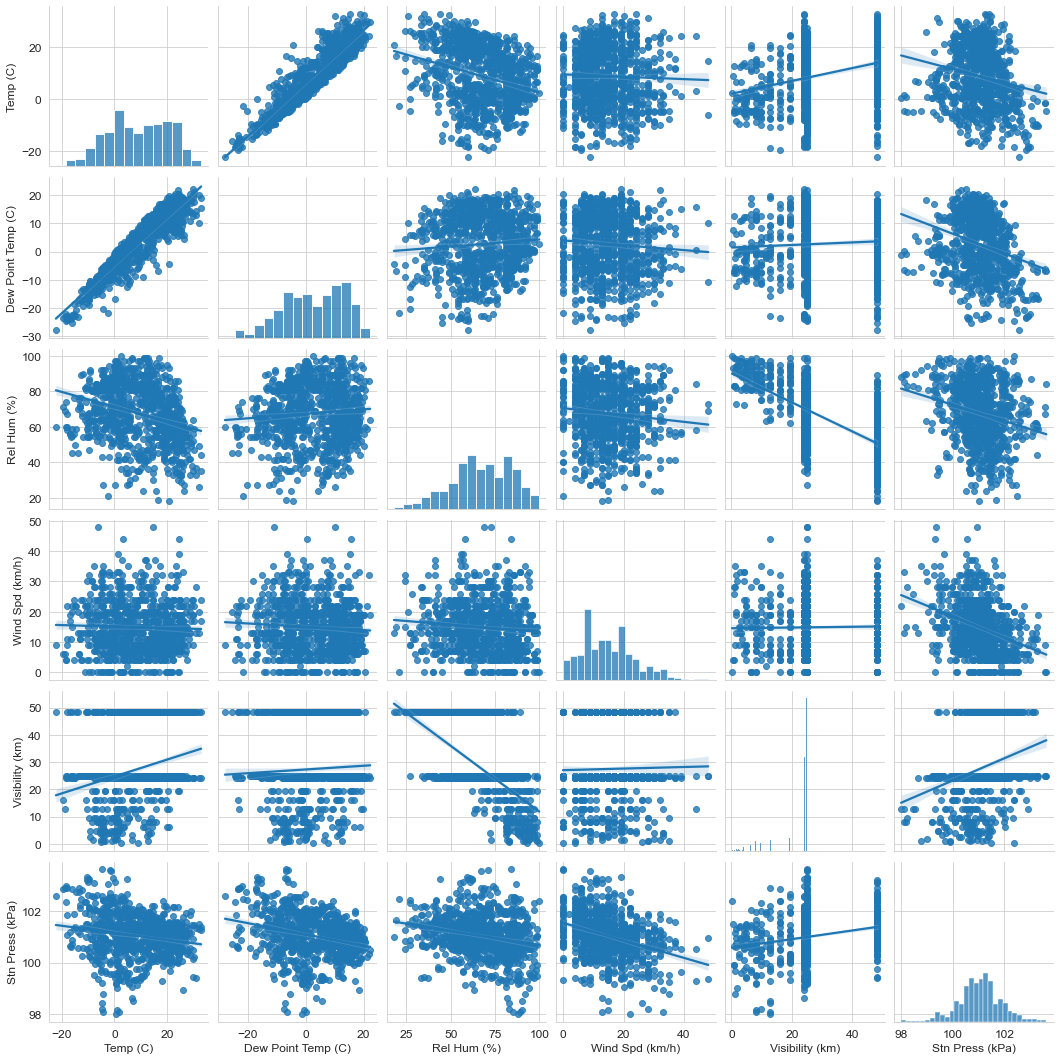

In [6]:
smpl=df.sample(n=round(len(df)*0.1))
sns.pairplot(data=smpl,kind='reg')

In [7]:
df.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


          Weather  Date/Time
19   Mainly Clear       2106
23  Mostly Cloudy       2069
1          Cloudy       1728
0           Clear       1326
35           Snow        390
24           Rain        306
25   Rain Showers        188
7             Fog        150
28       Rain,Fog        116
3     Drizzle,Fog         80


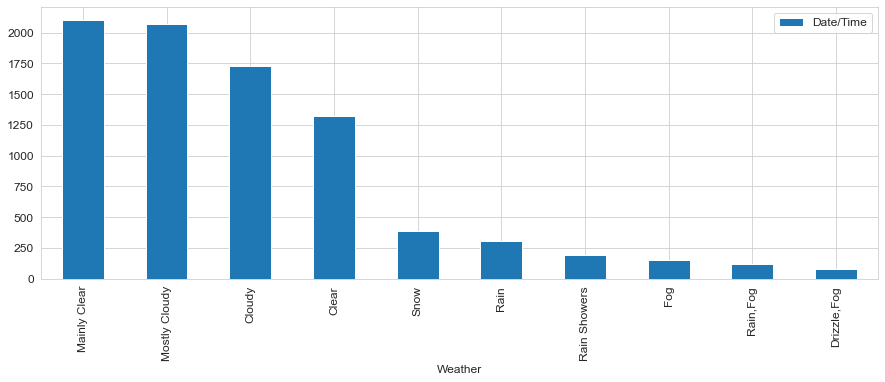

In [8]:
df.groupby('Weather').count()['Date/Time'].reset_index().sort_values('Date/Time',ascending=False).head(10).plot(x='Weather',kind='bar')
print(df.groupby('Weather').count()['Date/Time'].reset_index().sort_values('Date/Time',ascending=False).head(10))

<AxesSubplot:ylabel='Weather'>

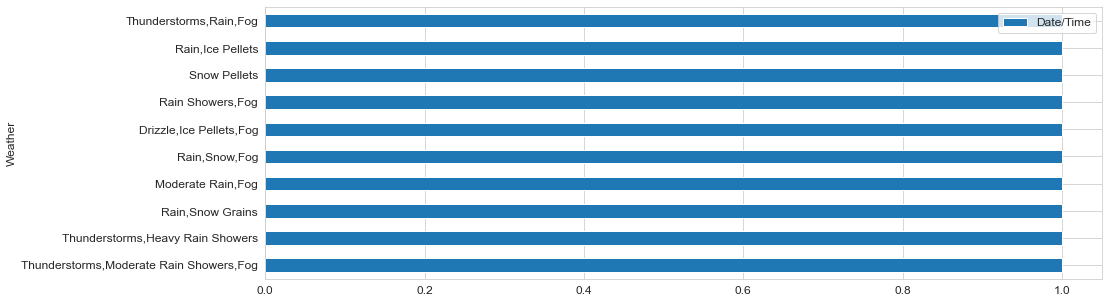

In [9]:
df.groupby('Weather').count()['Date/Time'].reset_index().sort_values('Date/Time',ascending=False).tail(10).plot(x='Weather',kind='barh')

<AxesSubplot:xlabel='Date/Time', ylabel='Rel Hum (%)'>

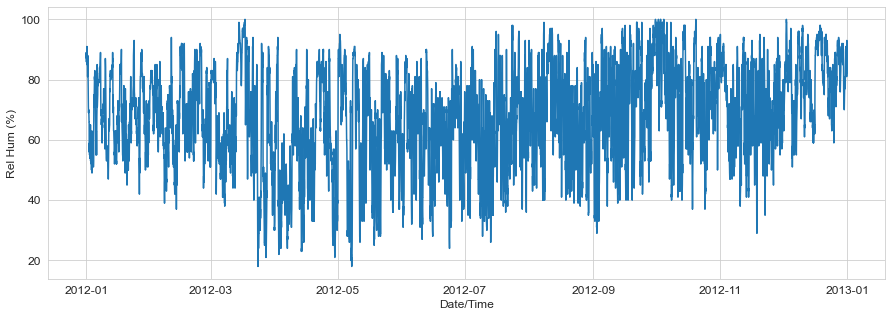

In [10]:
sns.lineplot(data=df,x='Date/Time',y=df['Rel Hum (%)'])

In [11]:
df['date']=df['Date/Time'].dt.date

<AxesSubplot:xlabel='date'>

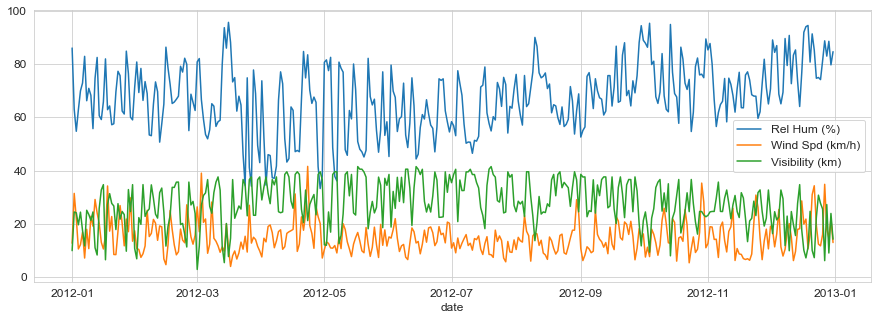

In [12]:
df.groupby('date').mean()[['Rel Hum (%)','Wind Spd (km/h)','Visibility (km)']].plot()

<AxesSubplot:xlabel='date'>

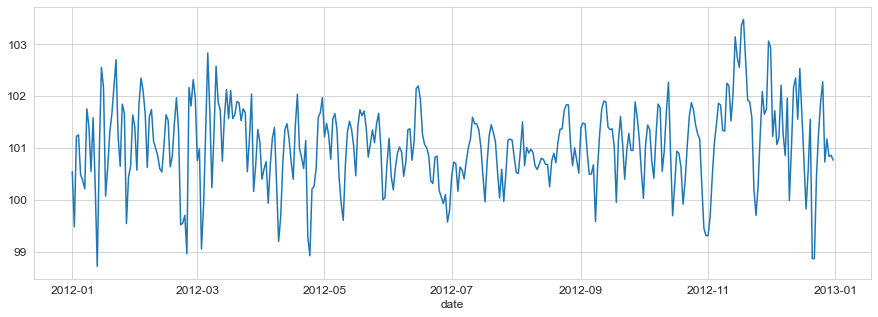

In [13]:
df.groupby('date').mean()['Stn Press (kPa)'].plot()

In [14]:
df['hour']=df['Date/Time'].dt.hour
df.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,date,hour
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,2012-01-01,0
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,2012-01-01,1
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",2012-01-01,2
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",2012-01-01,3
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,2012-01-01,4


In [17]:
df['month']=df['Date/Time'].dt.month
df.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,date,hour,month
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,2012-01-01,0,1
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,2012-01-01,1,1
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",2012-01-01,2,1
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",2012-01-01,3,1
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,2012-01-01,4,1


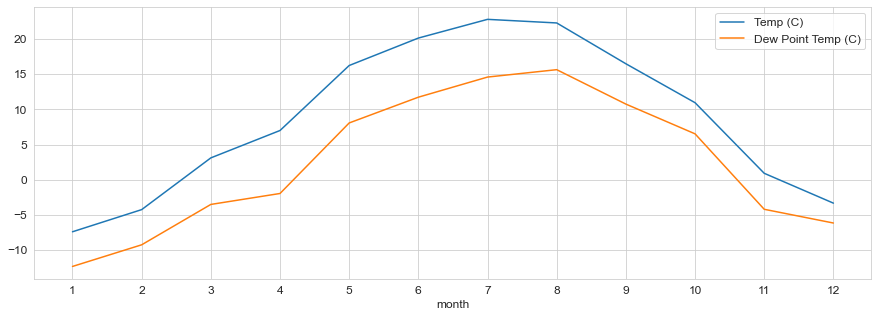

In [23]:
month=df.groupby('month').mean()[['Temp (C)','Dew Point Temp (C)']].reset_index()
month.plot(x='month')
plt.xticks(month.month)
plt.show()

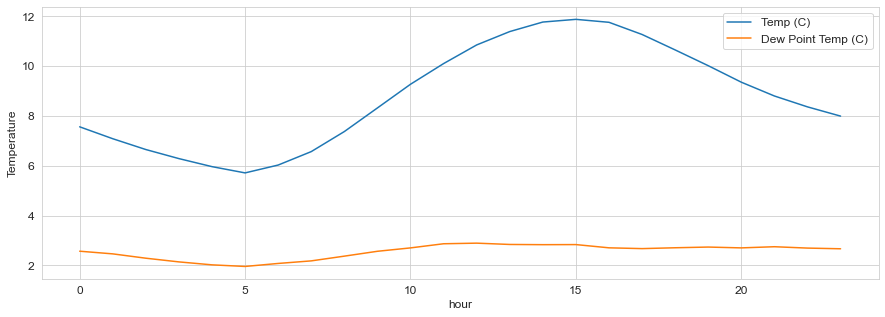

In [19]:
df.groupby('hour').mean()[['Temp (C)','Dew Point Temp (C)']].plot()
plt.ylabel('Temperature')
plt.show()

C:\Users\TajwarAbtahee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Temp (C)', ylabel='Density'>

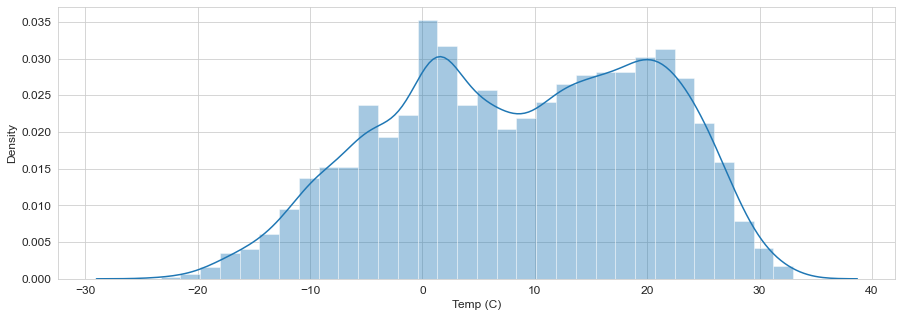

In [20]:
sns.distplot(df['Temp (C)'])

C:\Users\TajwarAbtahee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rel Hum (%)'>

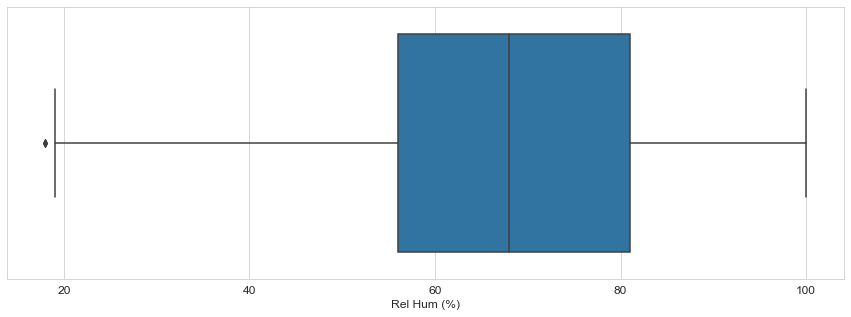

In [21]:
sns.boxplot(df['Rel Hum (%)'])

C:\Users\TajwarAbtahee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Stn Press (kPa)'>

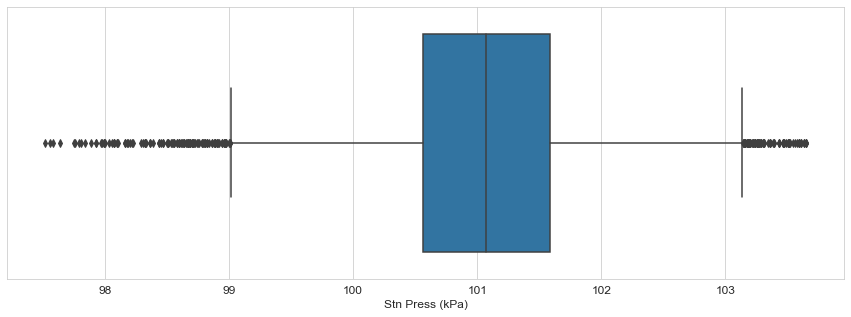

In [22]:
sns.boxplot(df['Stn Press (kPa)'])

In [28]:
df.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,date,hour,month
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,2012-01-01,0,1
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,2012-01-01,1,1
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",2012-01-01,2,1
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",2012-01-01,3,1
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,2012-01-01,4,1


In [ ]:
px.scatter(df,x='Temp (C)',y='Dew Point Temp (C)',animation_frame='date',animation_group='Temp (C)')